# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense


# **Import MNIST Dataset**

In [ ]:
df = tf.keras.datasets.mnist

# **Load Dataset**

In [ ]:
(x_train , y_train) , (x_test , y_test) = df.load_data()

#**Data Preprocessing**

In [ ]:
# Reshape X_train
x_train = x_train.reshape(x_train.shape[0] , 28 , 28 , 1).astype('float32')

# x_train Normalization
x_train = x_train / 255


# Reshape X_test
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1).astype('float32')

# x_test Normalization
x_test =x_test / 255

In [ ]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
print("The Shape of X_train = " , x_train.shape)

print("The Shape of X_test = " , x_test.shape)

The Shape of X_train =  (60000, 28, 28, 1)
The Shape of X_test =  (10000, 28, 28, 1)


# **MNIST Ploting**

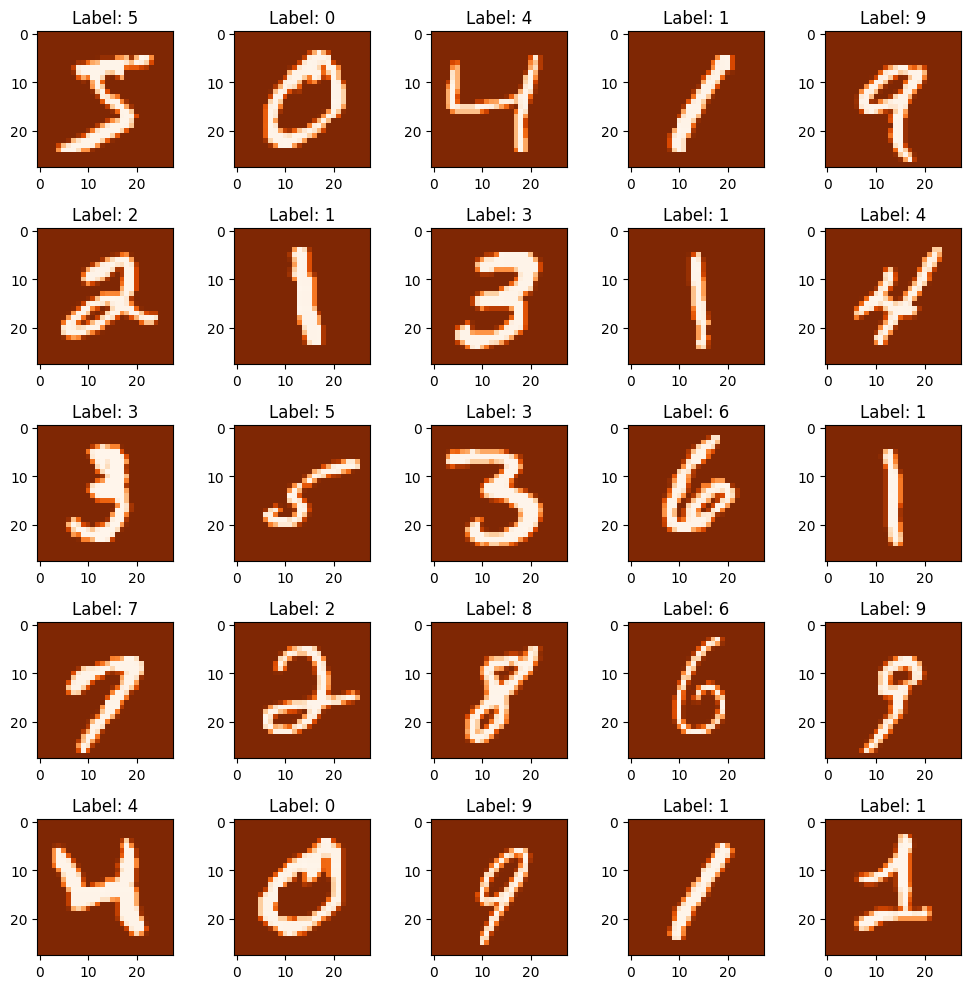

In [ ]:
#Plot Figure
fig, axes = plt.subplots(nrows = 5 , ncols = 5 , figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(x_train[i], cmap='Oranges_r')
        ax.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

# **Split the Training Data into Training and Validation**

In [ ]:
(x_train , x_vald , y_train , y_vald) = train_test_split(x_train , y_train , test_size = 0.2 , random_state = 42)

# **LeNet-5 Architecture**

In [ ]:
model = Sequential([
    Conv2D(6, kernel_size = (5, 5) , activation ='tanh', input_shape=(28, 28, 1)),
    AveragePooling2D(),
    Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

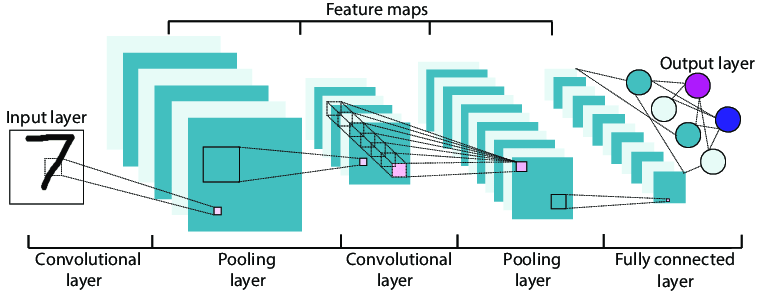

# **Print LeNet-5 architecture**

In [ ]:
print("The LeNet Architecture is: ")
model.summary()

The LeNet Architecture is: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)          

# **The Model Training**

In [ ]:
# Compile the model using Adam Optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_vald, y_vald), epochs=10, batch_size=128)


Epoch 1/10
375/375 [==============================] - 22s 55ms/step - loss: 0.4182 - accuracy: 0.8785 - val_loss: 0.1953 - val_accuracy: 0.9431
Epoch 2/10
375/375 [==============================] - 20s 54ms/step - loss: 0.1542 - accuracy: 0.9544 - val_loss: 0.1190 - val_accuracy: 0.9651
Epoch 3/10
375/375 [==============================] - 20s 54ms/step - loss: 0.1017 - accuracy: 0.9693 - val_loss: 0.0876 - val_accuracy: 0.9742
Epoch 4/10
375/375 [==============================] - 19s 51ms/step - loss: 0.0751 - accuracy: 0.9771 - val_loss: 0.0725 - val_accuracy: 0.9775
Epoch 5/10
375/375 [==============================] - 22s 59ms/step - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.0671 - val_accuracy: 0.9797
Epoch 6/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0629 - val_accuracy: 0.9806
Epoch 7/10
375/375 [==============================] - 19s 52ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0558 - val_accuracy:

# **Number of Trainable parameters in each layer**

In [ ]:
for layer in model.layers:
  print("The number of trainable Parameters = " , layer.name , layer.count_params())

The number of trainable Parameters =  conv2d_2 156
The number of trainable Parameters =  average_pooling2d_2 0
The number of trainable Parameters =  conv2d_3 2416
The number of trainable Parameters =  average_pooling2d_3 0
The number of trainable Parameters =  flatten_1 0
The number of trainable Parameters =  dense_3 30840
The number of trainable Parameters =  dense_4 10164
The number of trainable Parameters =  dense_5 850


# **Confusion matrix relative to testing samples**

In [ ]:
# Testing
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[ 974    0    1    0    0    0    2    1    2    0]
 [   0 1128    0    1    0    1    2    1    2    0]
 [   1    1 1019    2    1    0    0    7    1    0]
 [   0    0    5  995    0    4    0    2    3    1]
 [   0    1    3    0  968    0    2    2    0    6]
 [   2    0    0   10    0  877    2    1    0    0]
 [   5    3    1    1    2    1  945    0    0    0]
 [   1    2    6    1    0    0    0 1016    1    1]
 [   3    0    6    6    1    5    2    6  943    2]
 [   1    2    1    3   12    1    0   11    2  976]]


# **Precision, Recall, and f1_score**

In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.984160002938714
Recall: 0.9841
F1 Score: 0.9840919775054872


#**Results and Our Comments**

LeNet-5 is a convolutional neural network (CNN) architecture it Specifically Created for Handwritten digit Recognition

**The Architecture of LeNet consists of:**

1-CNN Layers

2- Pooling Layers

3- Fully Connected Layers




**Accuracy:**


-The Accuracy of this MNIST is High because The architecture of LeNet was primarily designed and trained for handwritten digit (0 : 9) which consists of grayscale images.


-The Accuracy of this RGB Images is low because The architecture of LeNet was primarily designed and trained for handwritten digit (0 : 9) which consists of grayscale images.






**LeNet with GrayScaled vs LeNet with RGB:**



When LeNet is applied to grayscale images, it performs well due to several reasons:



**Architecture Suitability:** LeNet's architecture is specifically designed for simple feature extraction in two-dimensional images. It was built to identify simple patterns present in handwritten digits.


**Training Data Compatibility:** LeNet was trained on the MNIST dataset, which consists of 28x28 grayscale images. The network was optimized for this type of data during its training, making it highly effective for similar grayscale data.



**Simplicity of Features:** Handwritten digits in grayscale have simpler features compared to colored images. The absence of color reduces the complexity of the input, making it easier for the network to learn and recognize patterns.




However, when LeNet is used for RGB images, especially in tasks where the network was not specifically designed or trained for this type of data, there might be challenges and limitations:



**Architecture Limitations:**LeNet's architecture might not be complex or deep enough to effectively learn intricate features present in RGB images. It might struggle to capture the complexity of three-channel RGB data.



**Different Feature Representation:** Color images contain more information and complexity due to the additional channels. The network might require a deeper architecture and possibly more parameters to adequately learn and represent these complex features.



**Training on Grayscale Data:** Networks like LeNet, which were trained on grayscale data, might not generalize well to RGB data due to the differences in the patterns and features it learned during training.


in The LeNet Architecture we used tanh because when Yenn LeNet created this architecture he found tanh is more suitable for this architecture and the accurecy score is high...but also we could use any other acctivation function.



we used Average pooling instead of max pooling for the same reasone and Average pooling tends to provide some degree of noise suppression in the feature maps, making the network more robust against overfitting. It averages the values within the pooling window, reducing the impact of outlier values compared to max pooling, which takes the maximum value.


Average pooling can have a slight smoothing effect on the feature maps. This can help in retaining essential information and generalizing better to unseen data, which might be particularly useful in scenarios where noise or small variations are present.


Max pooling can be more prone to losing information since it only keeps the most significant feature within the pooling window. In some cases, particularly with shallower networks or specific datasets, average pooling might lead to more stable training dynamics and learning convergence.